In [8]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [17]:
dir_data = './data/'
data = os.path.join(dir_data,'application_train.csv')
df = pd.read_csv(data)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in df:
    if df[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(df[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            df[col] = le.fit_transform(df[col])            
print(df.shape)
df.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [20]:
# 對 AMT_CREDIT 做等寬劃分
df['equal_AMT_CREDIT'] =  pd.cut(df.AMT_CREDIT,20)
df.equal_AMT_CREDIT.value_counts()

(245250.0, 445500.0]      69385
(445500.0, 645750.0]      66579
(40995.0, 245250.0]       55724
(645750.0, 846000.0]      46150
(846000.0, 1046250.0]     26588
(1046250.0, 1246500.0]    18025
(1246500.0, 1446750.0]    13020
(1446750.0, 1647000.0]     5748
(1647000.0, 1847250.0]     3193
(1847250.0, 2047500.0]     1654
(2247750.0, 2448000.0]      560
(2047500.0, 2247750.0]      470
(2448000.0, 2648250.0]      297
(2648250.0, 2848500.0]       75
(2848500.0, 3048750.0]       12
(3849750.0, 4050000.0]       12
(3048750.0, 3249000.0]       11
(3249000.0, 3449250.0]        6
(3449250.0, 3649500.0]        2
(3649500.0, 3849750.0]        0
Name: equal_AMT_CREDIT, dtype: int64

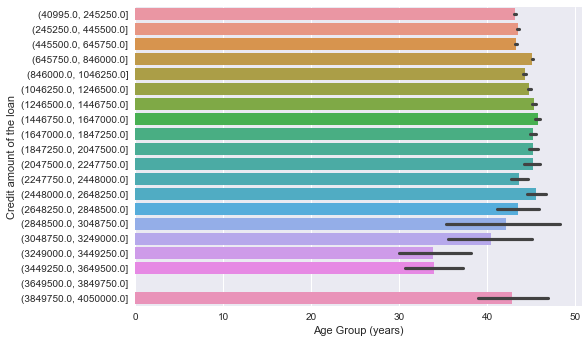

In [21]:
import seaborn as sns

px = abs(df.DAYS_BIRTH /365)
py = df.equal_AMT_CREDIT
sns.barplot(px,py)
plt.xlabel('Age Group (years)'); plt.ylabel('Credit amount of the loan')

In [25]:
## 對 AMT_CREDIT 做等頻劃分
df['freq_AMT_CREDIT'] = pd.qcut(df.AMT_CREDIT,20)
df.freq_AMT_CREDIT.value_counts()

(604152.0, 675000.0]      19355
(135000.0, 180000.0]      17693
(513531.0, 545040.0]      17372
(180000.0, 225000.0]      17040
(808650.0, 900000.0]      16964
(1133748.0, 1350000.0]    16559
(432000.0, 454500.0]      15568
(44999.999, 135000.0]     15511
(353241.0, 432000.0]      15370
(306306.0, 353241.0]      15337
(454500.0, 513531.0]      15258
(1024740.0, 1133748.0]    14999
(675000.0, 755190.0]      14711
(225000.0, 254700.0]      14681
(1350000.0, 4050000.0]    14034
(270000.0, 306306.0]      13895
(254700.0, 270000.0]      13496
(545040.0, 604152.0]      13354
(900000.0, 1024740.0]     13320
(755190.0, 808650.0]      12994
Name: freq_AMT_CREDIT, dtype: int64

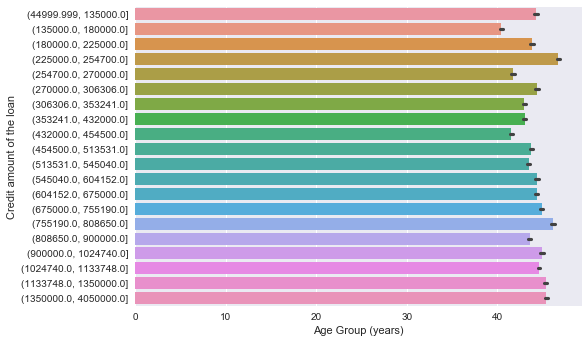

In [26]:
import seaborn as sns

px = abs(df.DAYS_BIRTH /365)
py = df.freq_AMT_CREDIT
sns.barplot(px,py)
plt.xlabel('Age Group (years)'); plt.ylabel('Credit amount of the loan')